# Proyecto Regrsion Lineal Demografica


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
from sklearn.feature_selection import f_classif, SelectKBest, RFE

In [43]:
# Cargamos el data set
ruta = r"C:\Users\Alia\Documents\GitHub\Proyectos de clase\Proyecto Regresion lineal demografico\aliasys-machine-probability\data\raw\demographic_health_data.csv"
df = pd.read_csv(ruta, sep=",")

In [44]:
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [46]:
df.info(list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [36]:
df.columns.tolist()

['fips',
 'tot_pop',
 '0-9',
 '0-9_y/o_%_of_total_pop',
 '19-oct',
 '10-19_y/o_%_of_total_pop',
 '20-29',
 '20-29_y/o_%_of_total_pop',
 '30-39',
 '30-39_y/o_%_of_total_pop',
 '40-49',
 '40-49_y/o_%_of_total_pop',
 '50-59',
 '50-59_y/o_%_of_total_pop',
 '60-69',
 '60-69_y/o_%_of_total_pop',
 '70-79',
 '70-79_y/o_%_of_total_pop',
 '80+',
 '80+_y/o_%_of_total_pop',
 'white-alone_pop',
 '%_white-alone',
 'black-alone_pop',
 '%_black-alone',
 'native_american/american_indian-alone_pop',
 '%_na/ai-alone',
 'asian-alone_pop',
 '%_asian-alone',
 'hawaiian/pacific_islander-alone_pop',
 '%_hawaiian/pi-alone',
 'two_or_more_races_pop',
 '%_two_or_more_races',
 'pop_estimate_2018',
 'n_pop_chg_2018',
 'gq_estimates_2018',
 'r_birth_2018',
 'r_death_2018',
 'r_natural_inc_2018',
 'r_international_mig_2018',
 'r_domestic_mig_2018',
 'r_net_mig_2018',
 'less_than_a_high_school_diploma_2014-18',
 'high_school_diploma_only_2014-18',
 "some_college_or_associate's_degree_2014-18",
 "bachelor's_degree_or_

In [47]:
df.shape

(3140, 108)

In [48]:
# Limpieza de valores nulos
df.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [49]:
# Verificar si tiene duplicados
df.duplicated().sum()

np.int64(0)

In [50]:
df.drop_duplicates(inplace=True)


In [51]:
df.select_dtypes(include='object').nunique()

COUNTY_NAME    1841
STATE_NAME       51
dtype: int64

- Amalisis descriptivo categorico

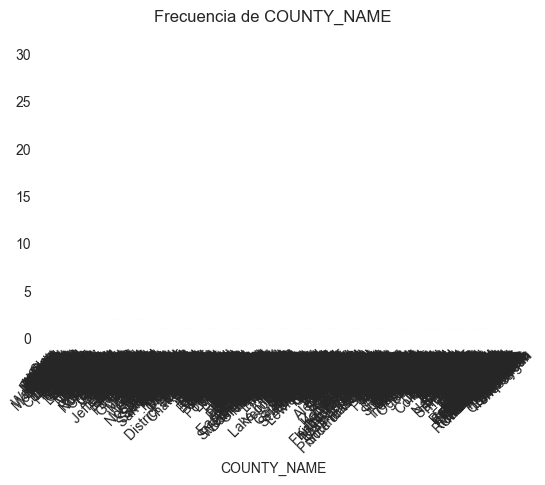

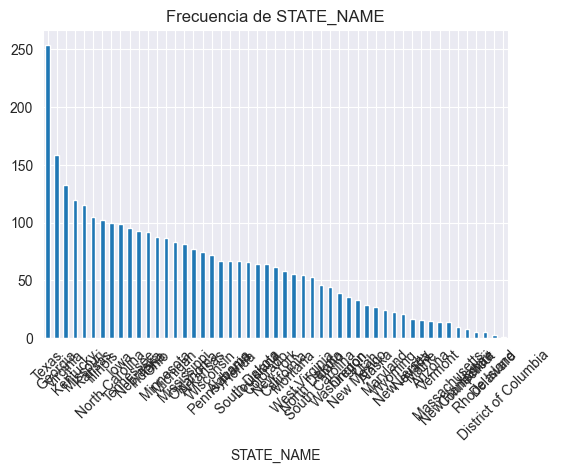

In [52]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

- Analisis descriptivo numerico

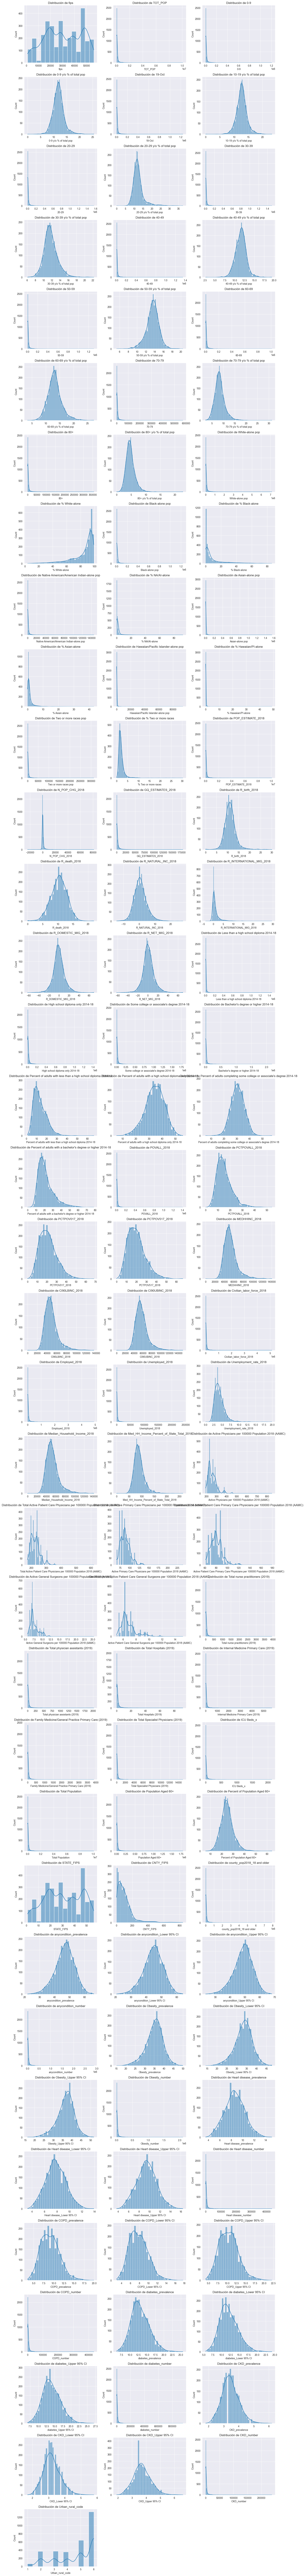

In [53]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include='number').columns

# Calcular número de filas y columnas para subplots (por ejemplo, 3 columnas por fila)
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

# Crear los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Aplana los ejes para acceder fácilmente

# Dibujar los histogramas
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Creamos el mapa de calor de las variables numericas

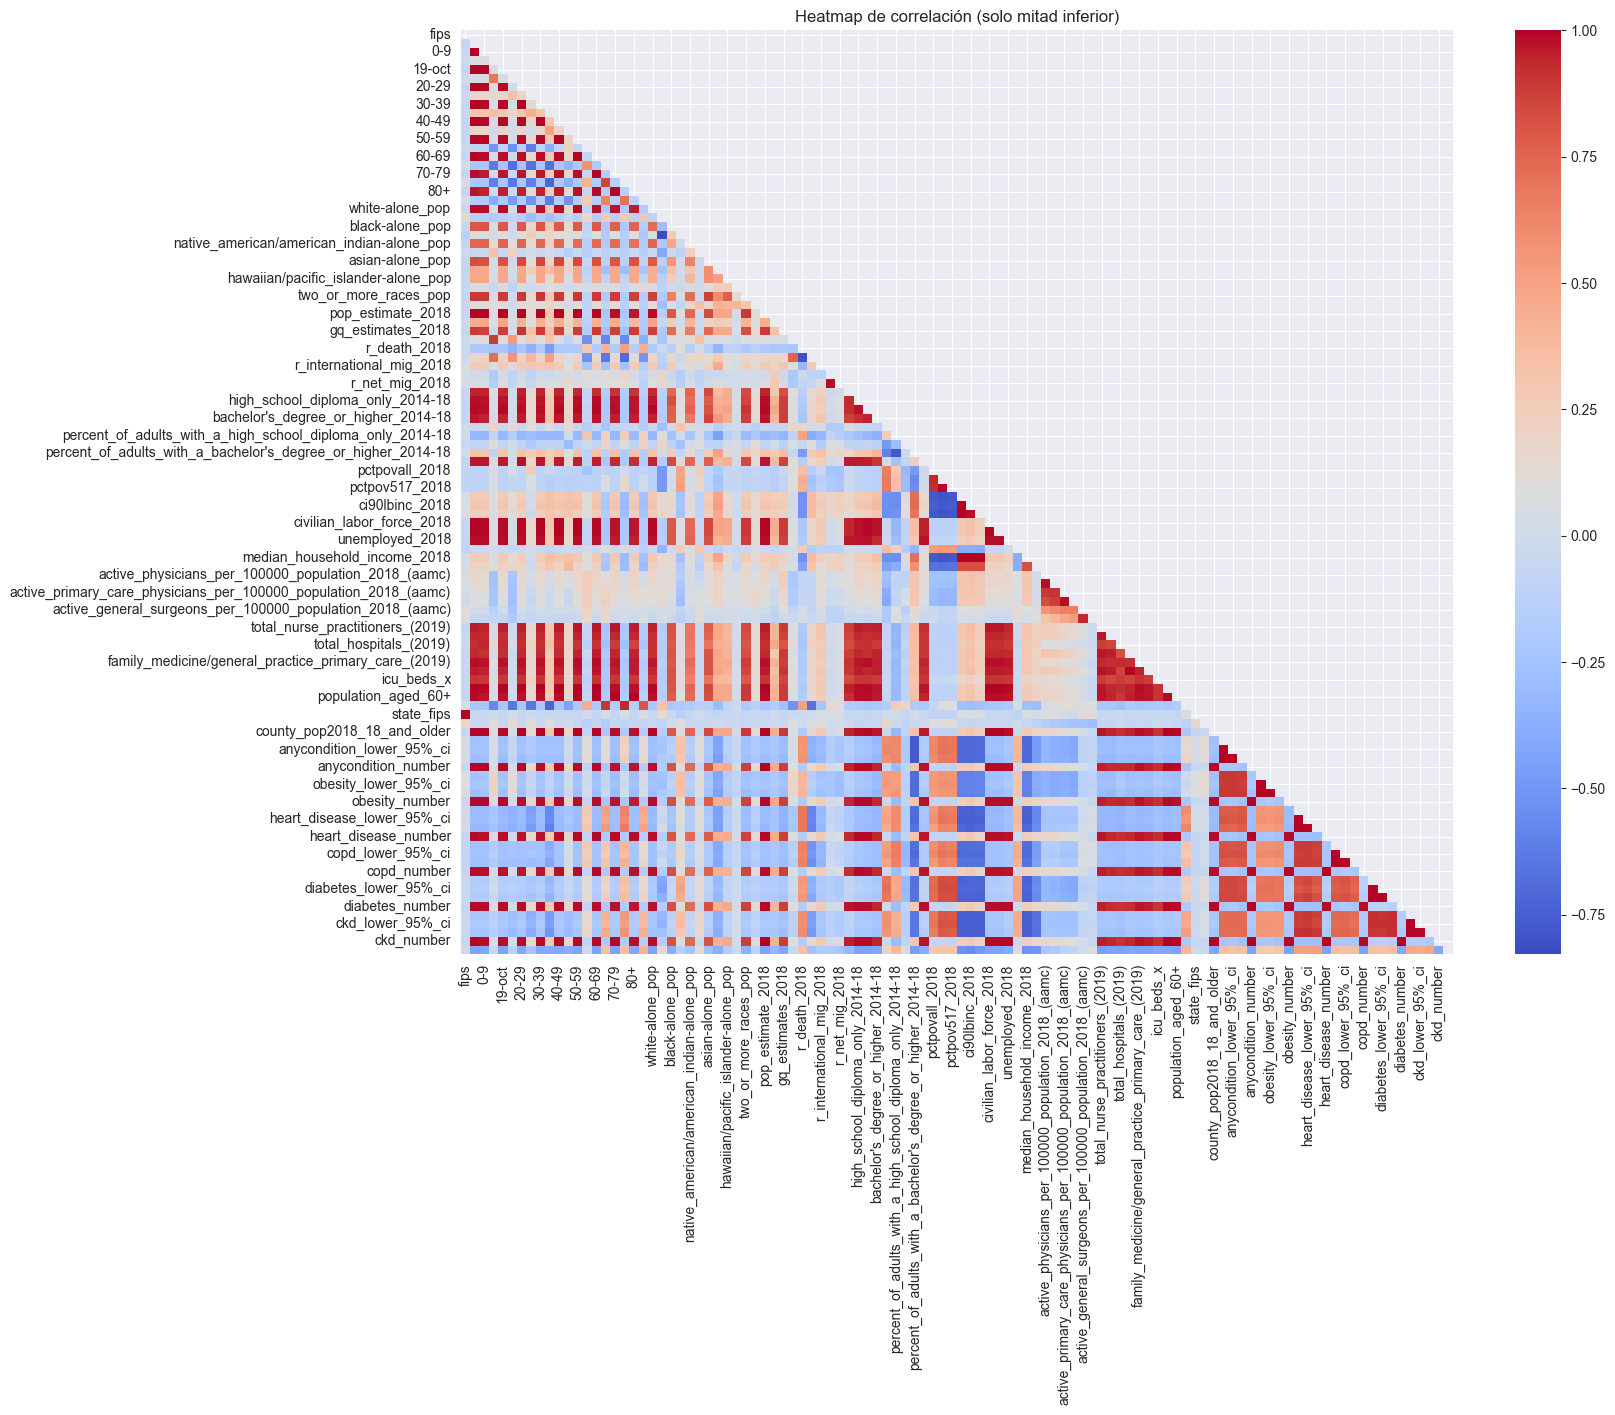

In [41]:
# 1. Seleccionar solo las columnas numéricas
num_df = df.select_dtypes(include='number')

# 2. Calcular la matriz de correlación
corr = num_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', mask=mask)
plt.title('Heatmap de correlación (solo mitad inferior)')
plt.show()